## Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import string
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer , SnowballStemmer
stemmer_s = SnowballStemmer('english')
from string import punctuation
stop_nltk=stopwords.words("english")
from nltk.tokenize import TweetTokenizer
tw=TweetTokenizer()
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
from nltk.tokenize import regexp_tokenize

In [2]:
data = pd.read_json('C:/Users/Kishlaya/Downloads/Datasets/Narendra Modi Tweets.json')
data_en = data.query('Lang=="en"')

In [3]:
data_en.head()

,Text,Lang,Source,Time,Retweets
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591
100,Tributes to the great Balasaheb Thackeray on h...,en,Twitter for iPhone,1579748075000,8817
101,India will always remain grateful to Netaji Su...,en,Twitter Media Studio,1579747999000,9996
102,"On 23rd January 1897, Janakinath Bose wrote in...",en,Twitter for iPhone,1579747828000,8500


## Cleaning the Text

In [4]:

def cleantxt(n):
    n=tw.tokenize(n.lower())
    stop_nltk=stopwords.words("english")
    upd_stop = stop_nltk + ['..','...','....',"n't",'https co','co','https watch','https','india','today'] 
    n = [term for term in n if term not in upd_stop and \
               term not in list(punctuation) and len(term)>2]
    n=[lemm.lemmatize(i) for i in n]
    res = " ".join(n)
    return res.replace('https','').replace('co','')

In [5]:
pd.set_option('display.max_colwidth', -1)
data_en['clean_text']=data_en.Text.apply(cleantxt)
data_en.head(1)

C:\Users\Kishlaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Text,Lang,Source,Time,Retweets,clean_text
0,Addressed the Global Potato Conclave at Gandhinagar via video-conferencing. \n\nShared how Indian farmers are taking… https://t.co/ZXhwJhW5hT,en,Twitter for iPhone,1580222363000,2388,addressed global potato nclave gandhinagar via video-nferencing shared indian farmer taking ://t./zxhwjhw5ht


## Getting the WordCloud

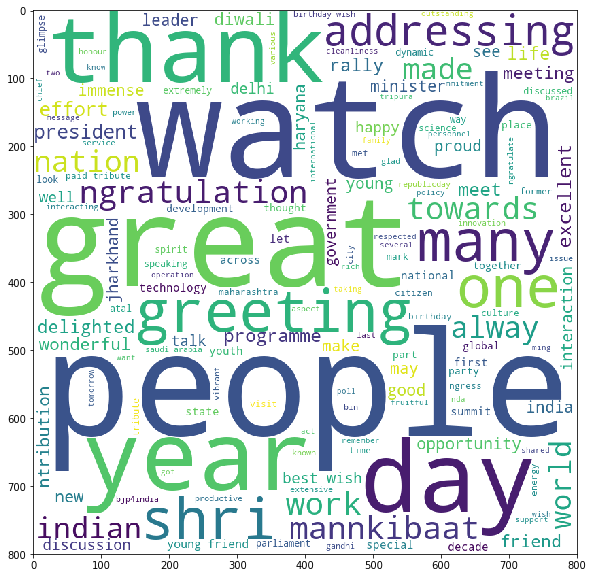

In [6]:
#New WordCloud
tweet=" ".join(data_en['clean_text'].values)
#Initiating WordCloud
word_cloud = WordCloud().generate(tweet)
#Beautifying
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(tweet)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

- As we can see the word "GREAT" has been used many times, even by other political people this word is being used excessively. Hence we need 'bigrams' to check whether this word is being used in a positive or negative sense.
- In my opinion the words enhancement, progress and development must be used more extensively in place of GREAT. The reasoning behind this is the fact that progress is usually used with recovery or growth and development is used to give an optimistic view of the future, lastly, the enhancement would give a spiritual nature of the work being done to give a good image.

## Bigrams

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(data_en['clean_text'])

In [8]:
count_vect.get_feature_names()
DTM = pd.DataFrame(X.toarray(),columns=count_vect.get_feature_names())
TDM = DTM.T

count_vect_bg = CountVectorizer(ngram_range=(2,2),max_features=25)
X_bg = count_vect_bg.fit_transform(data_en['clean_text'])
DTM_bg = pd.DataFrame(X_bg.toarray(),columns=count_vect_bg.get_feature_names())
DTM_bg.head()

,best wish,birthday greeting,birthday wish,brics summit,crore indian,excellent meeting,five year,guru nanak,happy met,look forward,...,president jairbolsonaro,president jinping,prime minister,sardar patel,saudi arabia,sister brother,statue unity,watch speech,wide range,young friend
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


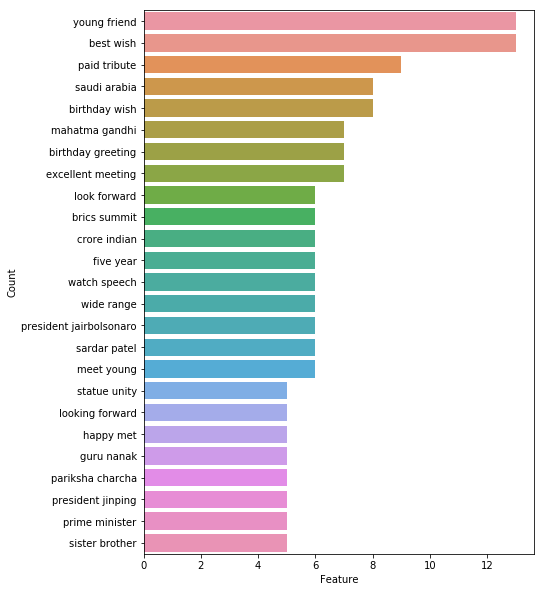

In [22]:
import seaborn as sns
plt.figure(figsize=(7,10))
d=DTM_bg.sum().sort_values(ascending=False)
y=pd.DataFrame(d)
y=y.reset_index()
sns.barplot(data=y,x=0,y='index')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

No Bigram for for the word "GREAT" found which means its being used almost everytime with different words.

## Clustering to get major topics


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect =TfidfVectorizer(max_features=2000)
X=tfidf_vect.fit_transform(data_en['clean_text'])
X.toarray()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=0)
y_means = kmeans.fit_predict(X.toarray())

#Top 5 words in each cluster or topic.
BOW=tfidf_vect.get_feature_names()
num_clusters = 4
arr=kmeans.cluster_centers_
ordered_clu = arr.argsort()[:,::-1]
for i in range(num_clusters):
    print('Cluster :',i)
    for i in ordered_clu[i,:5]:
        print(BOW[i])

Cluster : 0
great
year
mannkibaat
people
day
Cluster : 1
watch
addressing
rally
speaking
bjp
Cluster : 2
shri
birthday
greeting
effort
wish
Cluster : 3
thank
young
friend
meet
people


In [25]:
data_en['cluster']=y_means

C:\Users\Kishlaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


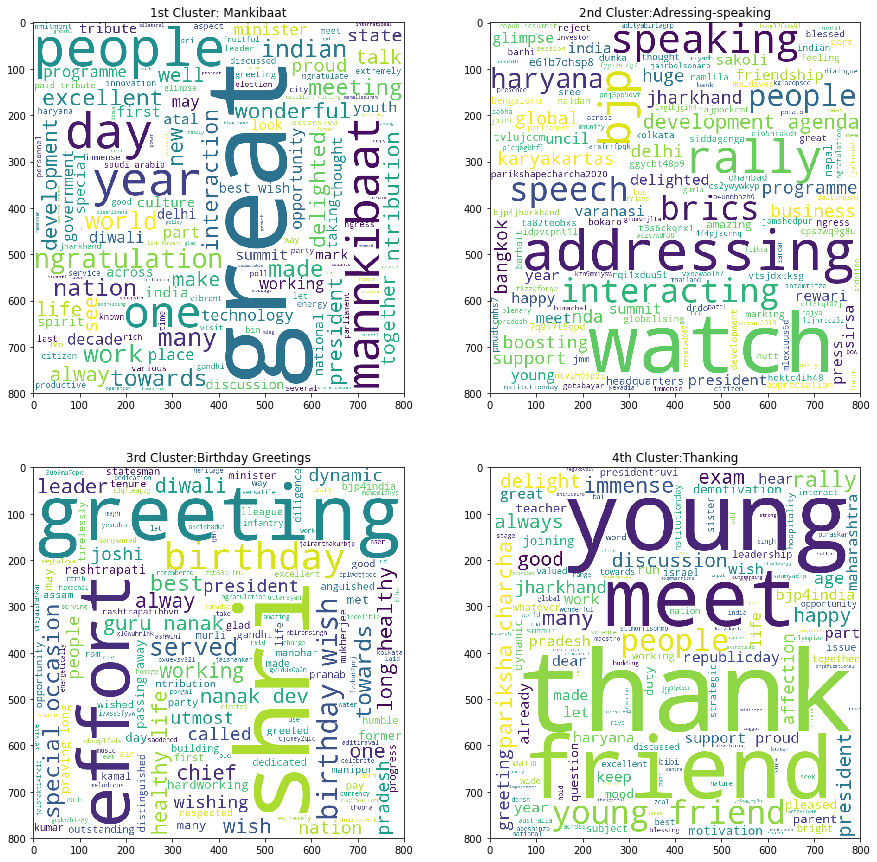

In [26]:
f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(2,2,1)
clus1=data_en.query('cluster==0')
tweet1=" ".join(clus1['clean_text'].values)
word_cloud = WordCloud().generate(tweet1)
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(tweet1)
plt.title('1st Cluster: Mankibaat')
plt.imshow(word_cloud)

plt.subplot(2,2,2)
clus2=data_en.query('cluster==1')
tweet2=" ".join(clus2['clean_text'].values)
word_cloud = WordCloud().generate(tweet2)
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(tweet2)
plt.title('2nd Cluster:Adressing-speaking')
plt.imshow(word_cloud)

plt.subplot(2,2,3)
clus3=data_en.query('cluster==2')
tweet3=" ".join(clus3['clean_text'].values)
word_cloud = WordCloud().generate(tweet3)
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(tweet3)
plt.title('3rd Cluster:Birthday Greetings')
plt.imshow(word_cloud)

plt.subplot(2,2,4)
clus4=data_en.query('cluster==3')
tweet4=" ".join(clus4['clean_text'].values)
word_cloud = WordCloud().generate(tweet4)
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(tweet4)
plt.title('4th Cluster:Thanking')
plt.imshow(word_cloud)

## Checking most "#" words used by Modiji

In [ ]:
def cleantxt(n):
    n=regexp_tokenize(n.lower(),'#[\w]+')
    upd_stop = stop_nltk + ['..','...','....',"n't",'https co','co','https watch','https','india','today'] 
    n = [term for term in n if term not in upd_stop and \
               term not in list(punctuation) and len(term)>2]
    n=[lemm.lemmatize(i) for i in n]
    res = " ".join(n)
    res.replace('https','').replace('co','')
    return res

data_en['clean_text']=data_en.Text.apply(cleantxt)

#New WordCloud
tweet=" ".join(data_en['clean_text'].values)
#Initiating WordCloud
word_cloud = WordCloud().generate(tweet)
#Beautifying
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(tweet)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

C:\Users\Kishlaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
